# Python versus Numpy

### Stijn Oomes

donderdag 10 februari 2022

---
 
**Python Data Science Handbook**

Chapter 2. Introduction to NumPy

https://learning.oreilly.com/library/view/python-data-science/9781491912126/ch02.html#introduction-to-numpy

## Importeer libraries

Controleer welke version van Python in dit notebook wordt gerund.

In [121]:
from platform import python_version

print(python_version())

3.10.2


Importeer Numpy en OpenCV en controleer welke versie worden gerund.

In [122]:
import numpy as np
print(np.__version__)

1.22.2


In [123]:
import cv2 as cv # Je ziet dat ik efficient ben en liever niet elke keer de '2' achter 'cv' wil typen.
print(cv.__version__)

4.5.5


Ik check ook meteen even de versies van Scikit-Learn, TensorFlow, en Keras. Deze libraries gaan we volgende week gebruiken.

In [124]:
import sklearn as sk
print(sk.__version__)

1.0.2


In [125]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [126]:
import keras as ks
print(ks.__version__)

2.8.0


## Definieer een parameter

Definieer een parameter n en geef het voorlopig even een relatief kleine waarde, bijvoorbeeld 4.

We beginnen de test met een datastructuur met weinig elementen. Daarna mag je die waarde zo groot maken als je computer aan kan.

In [127]:
n = 4

## Meet hoeveel geheugen wordt gebruikt

Hoe kunnen we zien hoeveel geheugen een datastructuur inneemt?

Definieer een lijst in Python met `n` elementen met een random waarde.

Hint: `import random`

In [128]:
import random

# jouw code

python_list = [random.random() for _ in range(n)]

python_list

[0.8757207129567962,
 0.06770071135317057,
 0.9806135210611548,
 0.22109728607738266]


Kijk daarna hoeveel bytes deze lijst in het geheugen inneemt.

Hint: `import sys`

In [129]:
import sys

# jouw code
sys.getsizeof(python_list)

88

Kijk ook hoeveel één element van deze lijst in het geheugen inneemt.

In [130]:
# jouw code
first_item = python_list[0]

sys.getsizeof(first_item)

24

Experimenteer eens met de grootte van andere datatypes. 

Hoeveel geheugen neemt een Boolean in? Verbaast je dat? => Ja, hoezo zou true meer geheugen innemen dan false? Boolean neemt bijne evenveel als een int in beslag

In [131]:
p = True

# jouw code
sys.getsizeof(p)


28

In [132]:
p = False

# jouw code
sys.getsizeof(p)


24

In [133]:
import time

def print_time(list):
    start = time.time()
    sum(list)
    end = time.time()
    print(end-start)
    

## Meet hoe lang een berekening duurt

Hoe lang duurt het om bijvoorbeeld alle getallen in onze lijst op te tellen?

In [134]:
sum(python_list)

2.145132231448504

Meet de starttijd, voer de sommatie uit, meet de eindtijd. Bepaal het verschil tusen eindtijd en begintijd. 

time.time() returns the number of seconds passed since epoch.

Hint: `import time`

In [135]:
import time

print_time(python_list)


0.0


In welke eenheid wordt de tijd gemeten?

## Python list

Maak twee Python lists van lengte ``n``. Vermenigvuldig die twee lists elementsgewijs. Tel vervolgens alle getallen bij elkaar op.

Bepaal hoeveel bytes de Python list in neemt.

Meet ook hoe lang deze berekeningen duren. Let op je parameter ``n`` is nu nog klein.

In [144]:
# jouw code
from timeit import default_timer as timer

list2 = [random.random() for i in range(n)]

multiplied_list = [a * b for a, b in zip(python_list, list2)]


print(sys.getsizeof(multiplied_list))
start = timer()
sum(multiplied_list)
end = timer()
print(end-start)





8856
0.00018780003301799297


## NumPy array

Maak twee NumPy arrays van lengte ``n``. Vermenigvuldig de twee arrays elementsgewijs. Tel vervolgens alle getallen bij elkaar op.

Bepaal hoeveel bytes de NumPy array in neemt.

Meet hoe lang deze berekeningen duren. Let op je parameter ``n`` is nu nog klein.

In [145]:
# jouw code

numpy_array1 = np.random.randint(255, size=n)
numpy_array2 = np.random.randint(255, size=n)


multiplied_list = np.multiply(numpy_array1, numpy_array2)

print(sys.getsizeof(multiplied_list))


start = timer()
multiplied_list.sum()
end = timer()
print(end-start)


8304
0.0002777001354843378


## Vergelijking Python list versus NumPy array

Kijk nu voor verschillende waardes van de parameter ``n`` hoe lang de berekeningen duren.

Bereken voor elke ``n`` de tijd voor de Python berekening gedeeld door de NumPy berekening.

Kies als verschillende ``n`` waardes bijvoorbeeld 4, 8, 16, 32, 64, 128, 256, 1024.

In [138]:
# jouw code
n = 4

timing_python = {}
timing_numpy = {}

while n <= 1024:
    python_list = [random.random() for i in range(n)]
    numpy_array = np.random.randint(255, size=n)
    
    start = timer()
    sum(python_list)
    end = timer()
    timing_python[n] = (end-start)
    
    start = timer()
    numpy_array.sum()
    end = timer()
    timing_numpy[n] = (end-start)
    
    n *= 2
    
print(timing_python)
print(timing_numpy)
    
    
    





{4: 3.2999087125062943e-06, 8: 1.800013706088066e-06, 16: 1.400010660290718e-06, 32: 1.500127837061882e-06, 64: 4.599802196025848e-06, 128: 3.8000289350748062e-06, 256: 4.500150680541992e-06, 512: 6.800051778554916e-06, 1024: 2.269982360303402e-05}
{4: 1.8800143152475357e-05, 8: 1.1700205504894257e-05, 16: 7.00005330145359e-06, 32: 6.6999346017837524e-06, 64: 2.650008536875248e-05, 128: 9.800074622035027e-06, 256: 8.19982960820198e-06, 512: 1.3299984857439995e-05, 1024: 4.0300190448760986e-05}


## Bonus: maak een grafiek

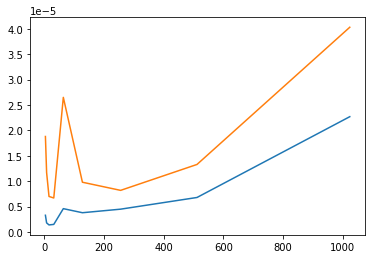

In [139]:
# jouw code

import matplotlib.pyplot as plt

# plot lines
plt.plot(timing_python.keys(), timing_python.values())
plt.plot(timing_numpy.keys(), timing_numpy.values())


